## Trabalho Final - Ciência de Dados - Enap / 2020

### Apresentação do Dataset

In [ ]:
'''Foi utilizado o datasets com dados das despesas cobertas pela Cota para Exercício da 
Atividade Parlamentar dos deputados federais, relacionando-o com o dataset de proposições apresentadas
em 2020. A cota parlamentar é o valor que os membros do Poder Legislativo têm direito a receber para 
cobrir despesas em função da sua atividade. Proposição é toda matéria submetida para apreciação da 
Camâra dos deputados. A partir das proposições são instauradas as leis que vão reger a
sociedade. O objetivo é verificar se o gasto da cota parlamenta reflete no número de proposições
apresentadas, gerando um maior retorno para a sociedade.'''

#### Link para Download do Dataset

In [ ]:
'''Dados disponibilizados em https://dadosabertos.camara.leg.br/swagger/api.html#staticfile 
acessados em 28/11/2020:
https://github.com/mauroslima/dados/raw/main/2020.xlsx
https://github.com/mauroslima/dados/raw/main/proposicoes_2020.csv '''

### Motivação Pessoal

In [ ]:
'''A Câmara dos Deputados custou em 2019 cerca de 4,5 bilhões de reais, um custo muito alto para um 
país com défict orçamentário. Não existem indicadores concretos da efetividade dos gastos do Poder 
Legislativo e a pandemia do coronavirus gerou o agravemento da situação fiscal, tornando-se fundamental
expor se o dinheiro está sendo bem empregado e o que pode ser cortado. '''

### Investigação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
sns.set_style(style='white')

In [2]:
path_gastos = 'https://github.com/mauroslima/dados/raw/main/2020.xlsx'
path_proposicoes = 'https://raw.githubusercontent.com/mauroslima/dados/main/proposicoes_2020.csv'
df_gastos = pd.read_excel(path_gastos, na_values=' ', dtype={'cpf':np.str, 'ideCadastro':np.str})
df_gastos.drop(['numSubCota', 'cpf', 'nuLegislatura', 'codLegislatura', 
                'numEspecificacaoSubCota', 'vlrGlosa', 'numParcela', 'txtPassageiro', 
                'txtTrecho', 'numLote', 'ideDocumento', 'urlDocumento', 'numRessarcimento', 
                'vlrRestituicao', 'nuCarteiraParlamentar', 'txtDescricaoEspecificacao', 
                'txtNumero', 'indTipoDocumento' ], inplace=True, axis=1)
df_gastos.rename(columns={'txNomeParlamentar':'parlamentar', 'sgUF': 'UF', 'sgPartido':
                          'partido', 'txtDescricao': 'descricao', 'txtFornecedor':'fornecedor',
                          'txtCNPJCPF':'CPF/CNPJ', 'datEmissao':'data_emissao', 
                          'vlrDocumento':'valor', 'vlrLiquido':'valor_liquido', 'numMes': 'mes', 
                          'numAno':'ano','ideCadastro':'id_deputado' }, inplace=True)
df_gastos = df_gastos.dropna(how='any',axis=0)
df_proposicoes = pd.read_csv(path_proposicoes, delimiter=';')
df_proposicoes = df_proposicoes.dropna(how='any',axis=0)
df_proposicoes['idDeputadoAutor'] = df_proposicoes['idDeputadoAutor'].astype(int)
df_proposicoes.rename(columns={'idDeputadoAutor':'id_deputado', 'nomeAutor': 'nome_deputado', 'siglaPartidoAutor':'partido', 'siglaUFAutor':'UF','idProposicao':'id_proposicao' }, inplace=True)
df_proposicoes.drop(['uriProposicao', 'uriAutor', 'codTipoAutor', 'uriPartidoAutor', 'ordemAssinatura', 'proponente', 'tipoAutor'], inplace=True, axis=1)

In [3]:
#gastos por deputado
gastos_deputados = df_gastos.groupby(['id_deputado','parlamentar', 'partido']).agg({'valor_liquido': 'sum'}
                                                 ).sort_values(by='valor_liquido', 
                                                               ascending=False)
gastos_deputados.reset_index(inplace=True)
gastos_deputados['id_deputado'] = gastos_deputados['id_deputado'].astype(int)
gastos_deputados.head(10)

,id_deputado,parlamentar,partido,valor_liquido
0,141459,João Maia,PL,471198.46
1,204435,Jesus Sérgio,PDT,444583.48
2,204469,Manuel Marcos,REPUBLICANOS,443124.03
3,74043,Wellington Roberto,PL,441890.36
4,204556,Marcelo Ramos,PL,438660.79
5,178970,João Daniel,PT,428839.85
6,160645,Luiz Carlos,PSDB,427510.54
7,74317,Júlio Cesar,PSD,424080.77
8,74419,Gonzaga Patriota,PSB,421995.96
9,204393,Frei Anastacio Ribeiro,PT,414511.33


In [4]:
#gastos por partido
gastos_partidos = df_gastos.groupby(['partido']).agg({'valor_liquido': 'sum'}).sort_values(by='valor_liquido', ascending=False)
gastos_partidos.reset_index(inplace=True)
gastos_partidos

,partido,valor_liquido
0,PT,13780670.74
1,PSL,11284155.40
2,PL,10076545.47
3,PP,9263400.79
4,MDB,8506840.99
5,PSD,8257598.71
6,REPUBLICANOS,8198290.56
7,PSDB,7792214.49
8,PDT,7500483.36
9,DEM,6829305.53


In [5]:
#proposições por deputado
proposicoes_deputado = df_proposicoes.groupby(['id_deputado', 'nome_deputado', 'partido']).size().sort_values(ascending=False)
proposicoes_deputado = proposicoes_deputado.to_frame()
proposicoes_deputado.reset_index(inplace=True)
proposicoes_deputado.rename(columns={0:'qtd_proposicoes'},inplace=True)
proposicoes_deputado.head(10)

,id_deputado,nome_deputado,partido,qtd_proposicoes
0,132504,Enio Verri,PT,1326
1,160511,Alessandro Molon,PSB,981
2,160575,Erika Kokay,PT,827
3,74439,Wolney Queiroz,PDT,819
4,204407,Fernanda Melchionna,PSOL,690
5,73943,Perpétua Almeida,PCdoB,567
6,74160,Patrus Ananias,PT,562
7,178857,Jorge Solla,PT,546
8,73531,Ivan Valente,PSOL,497
9,141470,José Guimarães,PT,494


In [6]:
#proposições por partidos
proposicoes_partido = df_proposicoes.groupby('partido').size().sort_values(ascending=False)
proposicoes_partido = proposicoes_partido.to_frame()
proposicoes_partido.reset_index(inplace=True)
proposicoes_partido.rename(columns={0:'qtd_proposicoes'},inplace=True)
proposicoes_partido

,partido,qtd_proposicoes
0,PT,16028
1,PSB,4412
2,PSOL,4067
3,PDT,2913
4,PSL,2088
5,PCdoB,1749
6,PP,1526
7,PSDB,1494
8,DEM,1285
9,PL,967


### Conclusões e Achados

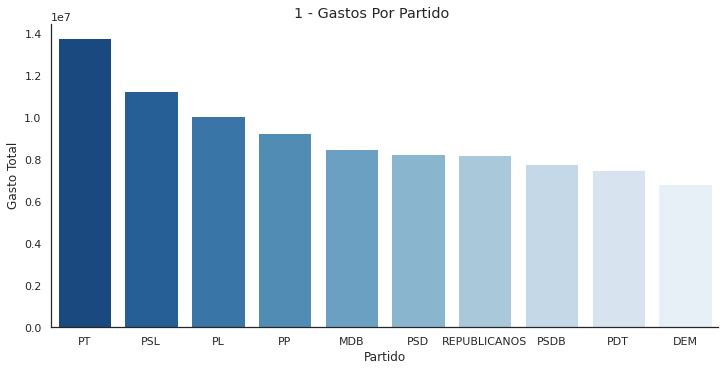

In [7]:
g_partido = sns.catplot(x='partido', y='valor_liquido', data=gastos_partidos.head(10), kind='bar',
                        aspect=2, palette=sns.color_palette('Blues_r', 10))
g_partido.fig.suptitle("1 - Gastos Por Partido")
g_partido.set(xlabel="Partido",ylabel="Gasto Total")
plt.show()

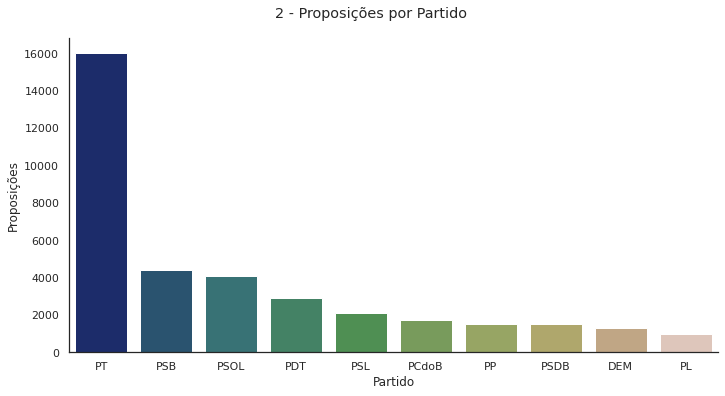

In [8]:
g_deputados = sns.catplot(x='partido', y='qtd_proposicoes',data=proposicoes_partido.head(10), kind="bar",
                        aspect=2,  palette="gist_earth")
g_deputados.fig.suptitle("2 - Proposições por Partido", y=1.05)
g_deputados.set(xlabel="Partido",ylabel="Proposições")
plt.show()

<AxesSubplot:title={'center':'3 - Gastos x Quantidade de proposições por deputado'}, xlabel='Gastos', ylabel='Proposições'>

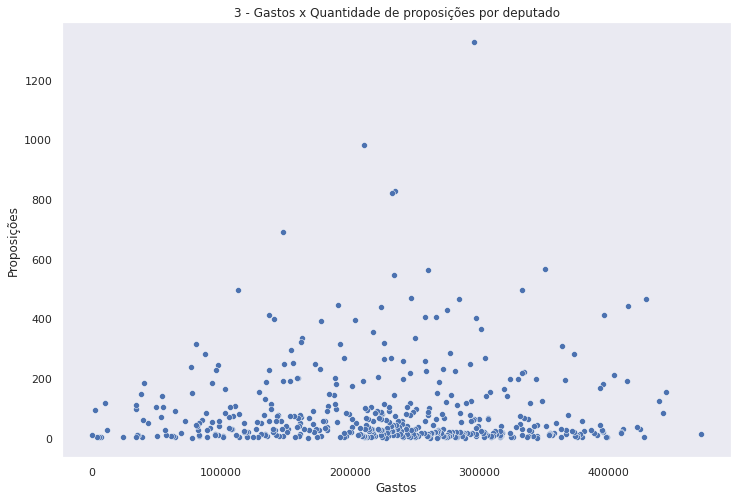

In [9]:
gastos_proposicoes = pd.merge(gastos_deputados, proposicoes_deputado, on='id_deputado', how='inner')
plt.figure(figsize=(12,8))
sns.set_style(style='dark')
plt.title('3 - Gastos x Quantidade de proposições por deputado')
plt.xlabel('Gastos')
plt.ylabel('Proposições')
sns.scatterplot(x='valor_liquido', y='qtd_proposicoes', data=gastos_proposicoes)

In [ ]:
'''
Analisando o gráfico 1, PT e PSL  apresentam mais gastos pois tem as maiores bancadas
da Câmara. Comparando a quantidade de proposições vs. o gasto total, sete partidos estão
nas duas listas, porém partidos com bancadas pequenas como PSOL e PCdoB apresentam grande número de
proposições e estão nas posições 17º/18º da lista de gastos com a cota parlamentar. Nenhum dos 10 deputados 
com mais gastos está entre os que mais apresentam proposições. O gráfico 3 mostra que a maioria dos 
deputados utilizam acima de R$ 100.000  da verba e menos de 200 proposições no ano de 2020.
Somados outros gastos como salários e verbas de gabinete, fica claro a baixa produtividade e alto 
custo do Poder Legislativo.
'''